In [1]:
import scipy as sp
import numpy as np
import qibo
from qibo.symbols import *
from qibo import hamiltonians
import matplotlib.pyplot as plt
from tqdm import tqdm

from functions import *

In [2]:
def sOpt(H, state):
    V = variance(H, state)
    s = 1/V
    return s

def sOpt2(H, state):
    V = variance(H, state)
    E = state.conj().T @ H @ state
    s = 1/(E+2*V)
    return s

def energyDiff(state, H , t):
    val1 = 2*np.real((np.exp(1j*t)-1) * (state.conj().T @ sp.linalg.expm(-1j*t*H) @ state) * (state.conj().T @ sp.linalg.expm(1j*t*H) @ H @ state ))
    val2 = 2*(1-np.cos(t))*np.abs(state.conj().T@ sp.linalg.expm(-1j*t*H)@ state)**2 * np.real(state.conj().T @ H @ state) 
    return val1, val2



In [3]:
def randomHamiltonian(nqubits, alpha = 1):
    A = np.random.rand(2**nqubits, 2**nqubits) + 1j*np.random.rand(2**nqubits, 2**nqubits)
    A = A + A.conj().T
    A /= np.linalg.norm(A)
    A = alpha*A
    return A

100%|██████████| 50/50 [03:41<00:00,  4.42s/it]


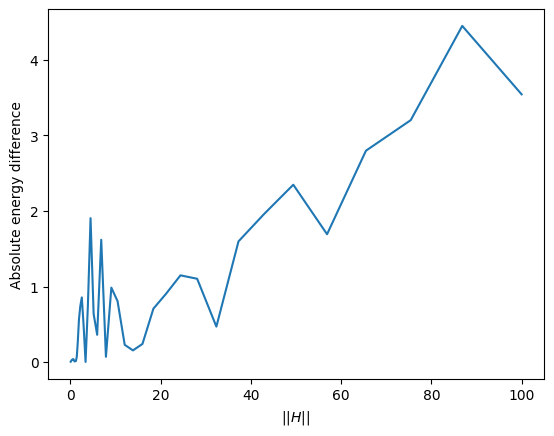

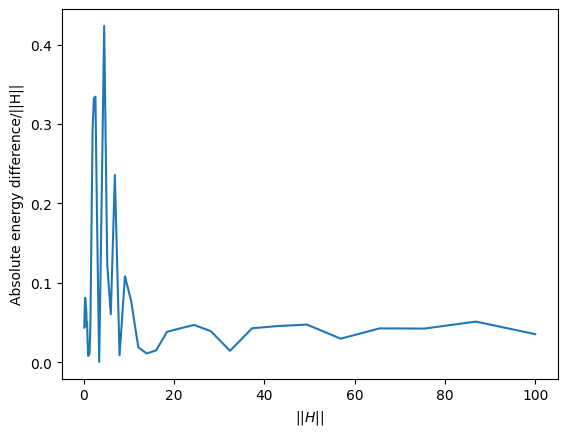

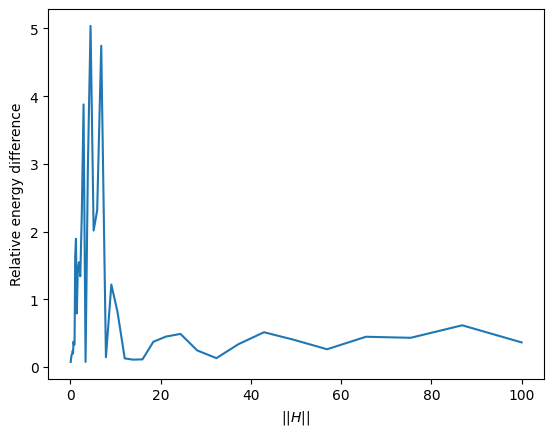

In [119]:
np.random.seed(0)
nqubits = 6
factor = np.logspace(-1, 2 , 50)
absResult = np.empty(len(factor))
relResult = np.empty(len(factor))
t = np.linspace(0, (2*np.pi)**2, 100)
repeats = 10

for i in tqdm(range(len(factor))):
    absDiff = np.zeros(repeats)
    relDiff = np.zeros(repeats)
    for k in range(repeats):
        H = randomHamiltonian(nqubits, factor[i])
        initState = np.random.rand(2**nqubits) + 1j*np.random.rand(2**nqubits)
        initState = initState/np.linalg.norm(initState)
        statePi = DBQITE(1, H, (np.pi)**2, initState)[-1,:]
        energyPi = statePi.conj().T @ H @ statePi
        energyDBQITE = np.zeros(len(t))
        for j in range(len(t)):
            stateDBQITE = DBQITE(1, H, t[j], initState)[-1,:]
            energyDBQITE[j] = np.real(stateDBQITE.conj().T @ H @ stateDBQITE)
        energyMin = np.min(energyDBQITE)
        absDiff[k] += np.abs(energyMin-energyPi)
        if  np.abs(energyMin-energyPi)/np.abs(energyMin) > 20:
            relDiff[k] += 0
        else:
            relDiff[k] += np.abs(energyMin-energyPi)/np.abs(energyMin)
    absResult[i] = np.sum(absDiff)/repeats
    relResult[i] = np.sum(relDiff)/repeats

plt.figure()
plt.plot(factor, absResult)
plt.xlabel(r'$||H||$')
plt.ylabel('Absolute energy difference')
plt.show()

plt.figure()
plt.plot(factor, absResult/factor)
plt.xlabel(r'$||H||$')
plt.ylabel('Absolute energy difference/||H||')
plt.show()

plt.figure()
plt.plot(factor, relResult)
plt.xlabel(r'$||H||$')
plt.ylabel('Relative energy difference')
plt.show()


100%|██████████| 20/20 [34:44<00:00, 104.21s/it]


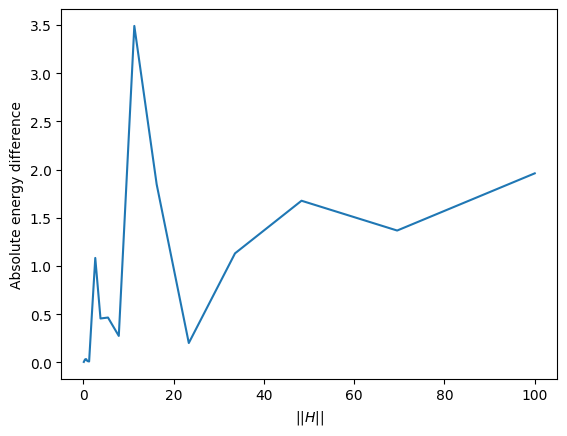

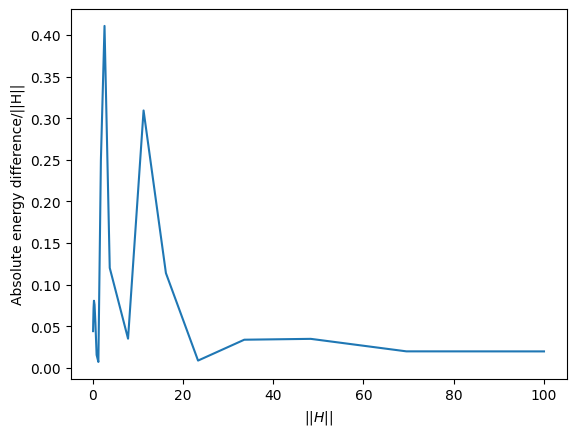

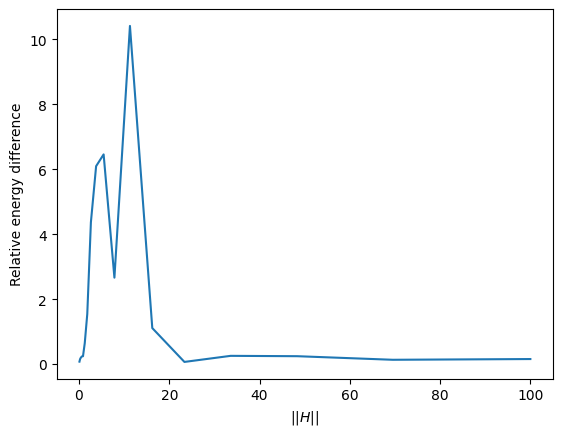

In [121]:
np.random.seed(0)
nqubits = 8
factor = np.logspace(-1, 2 , 20)
absResult = np.empty(len(factor))
relResult = np.empty(len(factor))
t = np.linspace(0, (2*np.pi)**2, 50)
repeats = 10

for i in tqdm(range(len(factor))):
    absDiff = np.zeros(repeats)
    relDiff = np.zeros(repeats)
    for k in range(repeats):
        H = randomHamiltonian(nqubits, factor[i])
        initState = np.random.rand(2**nqubits) + 1j*np.random.rand(2**nqubits)
        initState = initState/np.linalg.norm(initState)
        statePi = DBQITE(1, H, (np.pi)**2, initState)[-1,:]
        energyPi = statePi.conj().T @ H @ statePi
        energyDBQITE = np.zeros(len(t))
        for j in range(len(t)):
            stateDBQITE = DBQITE(1, H, t[j], initState)[-1,:]
            energyDBQITE[j] = np.real(stateDBQITE.conj().T @ H @ stateDBQITE)
        energyMin = np.min(energyDBQITE)
        absDiff[k] += np.abs(energyMin-energyPi)
        if  np.abs(energyMin-energyPi)/np.abs(energyMin) > 20:
            relDiff[k] += 0
        else:
            relDiff[k] += np.abs(energyMin-energyPi)/np.abs(energyMin)
    absResult[i] = np.sum(absDiff)/repeats
    relResult[i] = np.sum(relDiff)/repeats

plt.figure()
plt.plot(factor, absResult)
plt.xlabel(r'$||H||$')
plt.ylabel('Absolute energy difference')
plt.show()

plt.figure()
plt.plot(factor, absResult/factor)
plt.xlabel(r'$||H||$')
plt.ylabel('Absolute energy difference/||H||')
plt.show()

plt.figure()
plt.plot(factor, relResult)
plt.xlabel(r'$||H||$')
plt.ylabel('Relative energy difference')
plt.show()


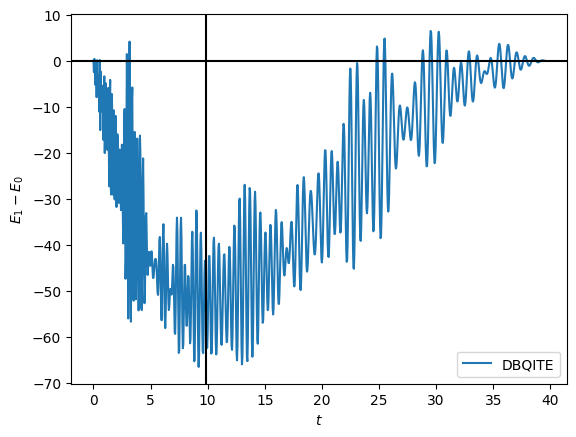

In [ ]:
nqubits = 4
H = randomHamiltonian(nqubits,alpha = 100)
stateInit = np.random.rand(2**nqubits) + 1j*np.random.rand(2**nqubits)
stateInit = stateInit/np.linalg.norm(stateInit)
t = np.linspace(0, (2*np.pi)**2, 1000)
energy0 = np.real(stateInit.conj().T @ H @ stateInit)
var = variance(H, stateInit)
energy = np.zeros(len(t))
energy2 = np.zeros(len(t))
val1 = np.zeros(len(t))
val2 = np.zeros(len(t))
energy_grad = np.zeros(len(t))
state = np.copy(stateInit)
for i in range(len(t)):
    state = DBQITE(1, H, t[i], stateInit)[-1,:]
    energy[i] = np.real(state.conj().T @ H @ state)-energy0
    #energy2[i] = energyDiff(stateInit, H, np.sqrt(t[i]))
    val1[i], val2[i] = energyDiff(stateInit, H, t[i])

energy_grad = np.gradient(energy)
plt.figure()
plt.plot(t, energy, label = 'DBQITE')
#plt.plot(t, -1*val1, label = 'Re')
#plt.plot(t, val2, label = 'cos')
#plt.plot(t, val1+val2)

# plt.axvline(x=s1, color='r')
# plt.axvline(x=s2, color='g')
plt.axhline(y = 0, color='k')
plt.axvline(x = np.pi**2, color='k')
plt.ylabel(r'$E_1-E_0$')
plt.xlabel(r'$t$')
plt.legend()
plt.show()



In [4]:
def decomposeInEigenBasis(eigenvectors, state):
    n = len(eigenvectors)
    coeff = np.zeros(n, dtype = complex)
    for i in range(n):
        coeff[i] = state.conj().T @ eigenvectors[:,i]
    return coeff

In [10]:
def energyDiffEnergyBasis(coeffs, eigenvalues, energy, t):
    n = len(coeffs)
    val1 = 0
    val2 = 0
    for i in range(n):
        for j in range(n):
            #val1 += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * np.cos((eigenvalues[i]+eigenvalues[j])*t)*(eigenvalues[i]-energy)
            #val2 += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * eigenvalues[i]*np.sin((eigenvalues[i]-eigenvalues[j])*t)
            delta = eigenvalues[i]-eigenvalues[j]
            val1 += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * eigenvalues[i] * (np.cos(t*(delta+1))-np.cos(t*delta))
    
    return 2*val1#(2*np.cos(t)-1)*val1 - 2*np.sin(t)*val2

Text(0.5, 0, '$t$')

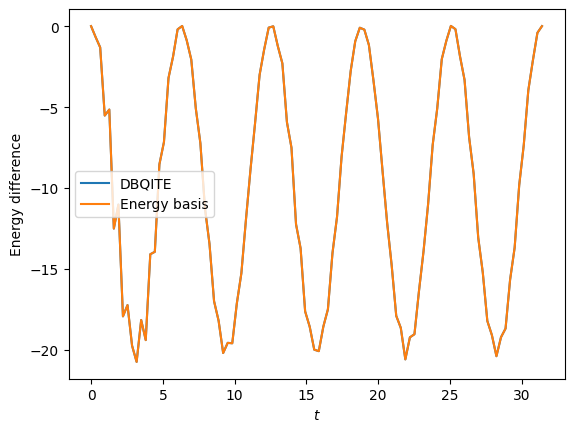

In [12]:
nqubits = 6
H = randomHamiltonian(nqubits, alpha = 10)
eigenvalues, eigenvectors = np.linalg.eigh(H)
initState = np.random.rand(2**nqubits) + 1j*np.random.rand(2**nqubits)
initState = initState/np.linalg.norm(initState)
coeff = decomposeInEigenBasis(eigenvectors, initState)
energy = np.real(initState.conj().T @ H @ initState)
t = np.linspace(0, (10*np.pi), 100)
energy_diff_ebasis = np.zeros(len(t))
energy_diff = np.zeros(len(t))
for i in range(len(t)):
    energy_diff_ebasis[i] = energyDiffEnergyBasis(coeff, eigenvalues, energy, t[i])
    #state = DBQITE(1, H, t[i], initState)[-1,:]
    # energy_diff[i] = np.real(state.conj().T @ H @ state) - energy
    e0, e1 = energyDiff(initState, H, t[i])
    energy_diff[i] = e0
plt.figure()
plt.plot(t, energy_diff, label = 'DBQITE')
plt.plot(t, energy_diff_ebasis, label = 'Energy basis')
plt.ylabel(r'Energy difference')
plt.legend()
plt.xlabel(r'$t$')
